Окие доки, время попробовать что-то смоделировать
# Моделирование

In [236]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from IPython.display import clear_output

In [10]:
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
random_state = 0

In [49]:
df = pd.read_csv('data/clean.csv')
df.head()

,A1,A2,A3,A5,A9,A10,A11,A19,A20,A21,A23,A24,A25,A26,A28,A29,A30,A31,A32,A33,A36,B5,B7,B8,B12,B13,B14,B15,B16,B17,B18,B21,B22,B27,B34,B35,B37,B38,B39,B40,B41,B43,B44,B45,B47,B48,B49,B50,B51,B52,B55,B56,B57,B60,B61,B62,B70,B81,анемия
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
# Разбиение на валидационную и тренировочную выборки со стратификацией по искомому полю
# Для показания результатов это надо:
#   В валидационной и тренировочной выборке одинаковое соотношение 
#   классов "с анемией" и "без анемии"
# Для финальной модели это плохо:
#   Модель могла "не увидеть" некоторые примеры "с анемией"
#   про примеры "без анемии" я молчу, их очень много
df_train, df_test = train_test_split(df, test_size=0.20, stratify=df['анемия'], shuffle=True, random_state=random_state)

In [99]:
y_train = df_train.pop('анемия')
x_train = df_train.copy()

y_test = df_test.pop('анемия')
x_test = df_test.copy()

tt = df.copy()
y = tt.pop('анемия')
x = tt.copy()

In [101]:
def test_model(clf, name: str) -> list[float]:
    clf.fit(x_train, y_train)
    Y_pred = clf.predict(x_test)
    clf.score(x_train, y_train)
    train_set = round(clf.score(x_train, y_train) * 100, 2)
    test_set = round(sum(Y_pred == y_test) / len(y_test) * 100, 2)
    whole_set = round(clf.score(x, y) * 100, 2)

    clear_output()
    print('=========================================================')
    print(f'Tested {name} classifier')
    print(f'Success rate on train subset = {train_set}%')
    print(f'Success rate on test subset = {test_set}%')
    print(f'Success rate on whole dataset = {whole_set}%')
    print('=========================================================')
    return train_set, test_set, whole_set

Ура, сами модели  
После отдельных блоков есть общая табличка, можете игнорировать и бежать сразу туда

## 1. Random Forest

In [104]:
rfc = RandomForestClassifier(n_estimators=1000, 
                             random_state=0)
random_forest_res = test_model(rfc, 'Random Forest')

Tested Random Forest classifier
Success rate on train subset = 98.85%
Success rate on test subset = 79.31%
Success rate on whole dataset = 94.94%


## 2. Logistic Regression

In [105]:
logreg = LogisticRegression()
logreg_res = test_model(logreg, 'Logistic Regression')

Tested Logistic Regression classifier
Success rate on train subset = 83.91%
Success rate on test subset = 83.91%
Success rate on whole dataset = 83.91%


## 3. Support Vector Machines

In [106]:
svc = SVC()
svc_res = test_model(svc, 'Support Vector Machines')

Tested Support Vector Machines classifier
Success rate on train subset = 83.91%
Success rate on test subset = 83.91%
Success rate on whole dataset = 83.91%


## 4. k-Nearest Neighbors

In [107]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_res = test_model(knn, 'k-Nearest Neighbors')

Tested k-Nearest Neighbors classifier
Success rate on train subset = 87.07%
Success rate on test subset = 80.46%
Success rate on whole dataset = 85.75%


## 5. Gaussian Naive Bayes

In [108]:
gaussian = GaussianNB()
gaussian_res = test_model(gaussian, 'Gaussian Naive Bayes')

Tested Gaussian Naive Bayes classifier
Success rate on train subset = 30.75%
Success rate on test subset = 33.33%
Success rate on whole dataset = 31.26%


## 6. Perceptron

In [109]:
perceptron = Perceptron()
perceptron_res = test_model(perceptron, 'Perceptron')

Tested Perceptron classifier
Success rate on train subset = 83.33%
Success rate on test subset = 80.46%
Success rate on whole dataset = 82.76%


## 7. Linear SVC

In [110]:
linear_svc = LinearSVC()
linear_svc_res = test_model(linear_svc, 'Linear SVC')

Tested Linear SVC classifier
Success rate on train subset = 84.48%
Success rate on test subset = 83.91%
Success rate on whole dataset = 84.37%


## 8. Stochastic Gradient Descent

In [111]:
sgd = SGDClassifier()
sgd_res = test_model(sgd, 'Stochastic Gradient Descent')

Tested Stochastic Gradient Descent classifier
Success rate on train subset = 71.26%
Success rate on test subset = 63.22%
Success rate on whole dataset = 69.66%


## Results

In [120]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC'],
    'Test Score': [svc_res[1], knn_res[1], logreg_res[1],
                   random_forest_res[1], gaussian_res[1], perceptron_res[1],
                   sgd_res[1], linear_svc_res[1]],

    'Train Score': [svc_res[0], knn_res[0], logreg_res[0],
              random_forest_res[0], gaussian_res[0], perceptron_res[0],
              sgd_res[0], linear_svc_res[0]],
    'Whole set Score': [svc_res[2], knn_res[2], logreg_res[2],
                        random_forest_res[2], gaussian_res[2], perceptron_res[2],
                        sgd_res[2], linear_svc_res[2]]})
models.sort_values(by=['Test Score'], ascending=False)

# Пожалуйста, игнорируйте левые индексы и очередность разных оценок
# Здесь идет сортировка по тестовой выборке

,Model,Test Score,Train Score,Whole set Score
0,Support Vector Machines,83.91,83.91,83.91
2,Logistic Regression,83.91,83.91,83.91
7,Linear SVC,83.91,84.48,84.37
1,KNN,80.46,87.07,85.75
5,Perceptron,80.46,83.33,82.76
3,Random Forest,79.31,98.85,94.94
6,Stochastic Gradient Decent,63.22,71.26,69.66
4,Naive Bayes,33.33,30.75,31.26


In [116]:
models.sort_values(by=['Whole set Score'], ascending=False)

# А здесь сортировка по всему датасету

,Model,Train Score,Test Score,Whole set Score
3,Random Forest,98.85,79.31,94.94
1,KNN,87.07,80.46,85.75
7,Linear SVC,84.48,83.91,84.37
0,Support Vector Machines,83.91,83.91,83.91
2,Logistic Regression,83.91,83.91,83.91
5,Perceptron,83.33,80.46,82.76
6,Stochastic Gradient Decent,71.26,63.22,69.66
4,Naive Bayes,30.75,33.33,31.26


На что стоит обратить внимание в табличке выше (первая сырая прогонка моделей классического ML):

![Табличка с подчеркиваниями](images/table1.jpg)

`Random forest` ПРЕКРАСНО себя показывает на целом датасете, но учитывая, что его `Test score` один из низших, а `Train score` наивысший - я боюсь оверфита... В принципе это и самая гибкая модель, возможно стоит поиграть с гиперпараметрами  

`SVC`, `Linear SVC` и `LogReg` показывают себя одинаково хорошо на всех выборках, ставлю лайк  

`Naive Bayes` и `SGD` идут спать  

`Perceptron` и `KNN` скорее всего, хоть и результат у них неплохой  

Дальше попробую поиграться с `Random forest` и DNN модельками

## 10. Neaural Net


In [191]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from keras import regularizers
from tensorflow.keras.optimizers import Adamax


In [ ]:
# перегон данных в формат, который понравится DNN
tf_x_train = tf.convert_to_tensor(x_train)
tf_y_train = tf.convert_to_tensor(y_train)
tf_y_train = tf.one_hot(tf_y_train, 2)

tf_x_test = tf.convert_to_tensor(x_test)
tf_y_test = tf.convert_to_tensor(y_test)
tf_y_test = tf.one_hot(tf_y_test, 2)

In [220]:
# сама модель, я пробовал много разных, делать модель шире и глубже смысла нет - результат одинаковый
model = Sequential()

model.add(Input(shape = (58,)))
model.add(Dense(32, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(128, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
#                 bias_regularizer=regularizers.l1(0.006), activation='relu'))
# model.add(Dense(512, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
#           bias_regularizer=regularizers.l1(0.006), activation='relu'))
# model.add(Dense(128, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
#           bias_regularizer=regularizers.l1(0.006), activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(Adamax(learning_rate = 0.01),
              loss=tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.1),
              metrics = ['Accuracy'])


In [221]:
model.fit(tf_x_train, tf_y_train,
    epochs = 10,
    batch_size = 16,
    validation_data = (tf_x_test, tf_y_test)
)

Epoch 1/10
22/22 [==============================] - 1s 21ms/step - loss: 0.8795 - Accuracy: 0.8247 - val_loss: 0.6454 - val_Accuracy: 0.8391
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5988 - Accuracy: 0.8391 - val_loss: 0.5686 - val_Accuracy: 0.8391
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5548 - Accuracy: 0.8391 - val_loss: 0.5492 - val_Accuracy: 0.8391
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5357 - Accuracy: 0.8391 - val_loss: 0.5375 - val_Accuracy: 0.8391
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5280 - Accuracy: 0.8391 - val_loss: 0.5342 - val_Accuracy: 0.8391
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5228 - Accuracy: 0.8391 - val_loss: 0.5274 - val_Accuracy: 0.8391
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5157 - Accuracy: 0.8391 - val_loss: 0.5245 - val_Accuracy: 0.8391
Epoch 8/10
22/22 [=

In [276]:
preds = model.predict(tf_x_test)
res = []
for idx in range(len(preds)):
    res.append(np.argmax(y[idx]) == np.argmax(preds[idx]))
    # print(f'True idx = {np.argmax(true[idx])}')
    # print(f'Predicted idx = {np.argmax(preds[idx])}')
print(f'Accuracy: {np.sum(y) / np.sum(res)*100:.04}%')


3/3 [==============================] - 0s 3ms/step
Accuracy: 80.46%


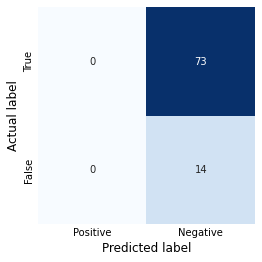

In [268]:
mat = confusion_matrix(y_test, res)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=['Positive', 'Negative'], yticklabels=['True', 'False'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()
# Вообще вот это очень важный кусок информации, дальше конкретнее

In [275]:
# Тоже самое, что и confusion matrix, но немного в другом формате
preds = (preds > 0.5)
clr = classification_report(tf_y_test, preds, \
                            target_names=['False', 'True'], \
                            digits=4, \
                            zero_division = 0)
print(f"Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

       False     0.8391    1.0000    0.9125        73
        True     0.0000    0.0000    0.0000        14

   micro avg     0.8391    0.8391    0.8391        87
   macro avg     0.4195    0.5000    0.4562        87
weighted avg     0.7041    0.8391    0.7657        87
 samples avg     0.8391    0.8391    0.8391        87



## Небольшие выводы

Нейронная сеть показывает **неплохой результат**. Более важную информацию мне дает **матрица несоответсвий (confusion matrix)**:

`100% recall` радует - все, кого модель посчитала `"положительными"` *(то есть те, кто могут пострадать от анемии)* - действительно перенесут/перенесли анемию.  
С другой стороны, `неполнота precision` настораживает - примрено `16%` людей, *кому алгоритм предскажет анемию* от нее на самом то деле не пострадают.  
Во всех подобных алгоритмах стоит **балансировать** между precision и recall и ***я пока не знаю*** что я стараться максимизировать: нахождение реальны подозрений на заболевание или отсутствие ложных срабатывайний...  

Если честно, ***я удивлен такими результатами***. Я ожидал что recall будет ниже, т.к. количество людей с анемией в датасете в *5 раз меньше*. С другой стороны *я мог просто очень крупно обосраться с интепритацией*, и на самом деле все цифры абсолютно наоборот и precision = recall, recall = precision.   

Учитывая схожесть результатов нескольких классических ML моделей и нейронной сети (DNN), толькой для которой я провел более глубокую валидацию *(пусть от лени проводить на остальных моделях)* и считаю, что скорее всего ***результаты по F1, recall и precision у них схожи***; назревает вывод - для более точных предсказаний стоит: 
1. балансировать и чистить данные глубже (отмечал в другом ноутбуке); 
2. пробовать вводить дополнительные параметры (возраст, пол, предрасположенность (если это играет роль));  

Ну и ответ про точность лучших моделей: `83.91%` в худшем случае (по precision), `91.25%` в среднем (по F1).
Реальную "важностную" общую точность (смотря что нам более выжно, см. выше) можно высчитать, выдав precision и recall разные веса.